<a href="https://colab.research.google.com/github/Fatema-Khanom/Machine-Learning-Practice/blob/main/Dog_vs_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:

!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_train = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

y_test = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20557 files belonging to 2 classes.
Found 5140 files belonging to 2 classes.


In [ ]:
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

y_train = y_train.map(process)
y_test = y_test.map(process)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2, 2) , strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2) , strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2) , strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(y_train, epochs=10, validation_data= y_test)

Epoch 1/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - accuracy: 0.5380 - loss: 0.7057 - val_accuracy: 0.7245 - val_loss: 0.5564
Epoch 2/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 77s 76ms/step - accuracy: 0.7174 - loss: 0.5551 - val_accuracy: 0.7395 - val_loss: 0.5220
Epoch 3/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7909 - loss: 0.4388 - val_accuracy: 0.7971 - val_loss: 0.4592
Epoch 4/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.8645 - loss: 0.3110 - val_accuracy: 0.7885 - val_loss: 0.5327
Epoch 5/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.9281 - loss: 0.1742 - val_accuracy: 0.7905 - val_loss: 0.7210
Epoch 6/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9642 - loss: 0.0965 - val_accuracy: 0.7905 - val_loss: 0.8262
Epoch 7/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 51s 80ms/step - accuracy: 0.9809 - loss: 0.0560 - val_accuracy: 0.7866 - val_loss: 1.0369
Epoch 8/10
643/643 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.9843 - loss: 0.0447 - 

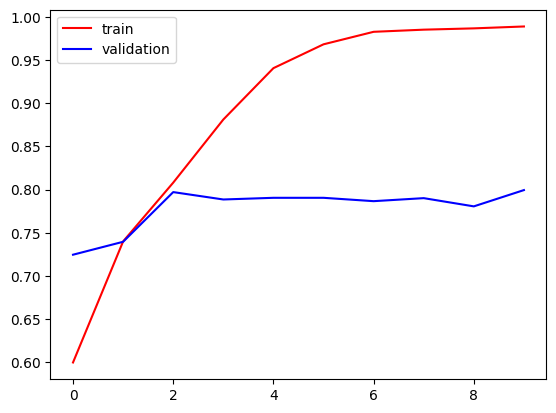

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

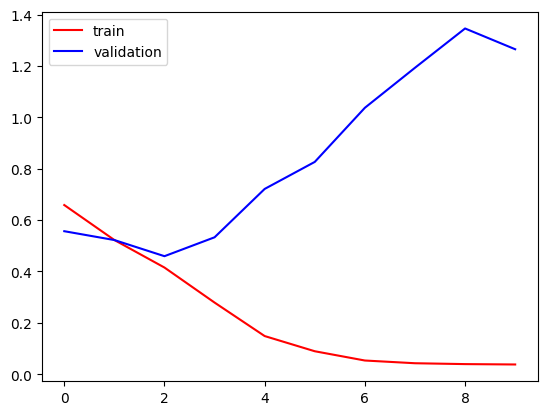

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('model.h5')